# Read & Clear Data

In [1]:
import numpy as np
import pandas as pd
import feather 
import matplotlib.pyplot as plt  
from time import time
from mailerWithUtf8 import mail

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import os

In [2]:
def save_dataframe(df, out_filename):
   # write to csv and no index
    t0 = time()
    df.to_csv(out_filename + ".csv", index=False, encoding='utf-8')
#     df.to_csv(out_filename + ".csv", encoding='utf-8')
    print("time for output csv file: %.2f" % (time()-t0))

In [3]:
# start_time = time()
# path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
# filename = '0713_april_marketing_anylze_full_table_group12_select_max_min.feather' 

# train_df = feather.read_dataframe(path + filename)
# # df = pd.read_csv(path + filename, error_bad_lines=False)

# print('load feather %s seconds', format(time() - start_time))

load feather %s seconds 0.5397324562072754


In [3]:
start_time = time()
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = '0713_april_marketing_anylze_full_table_group12_select_max_min_train.feather' 

train_df = feather.read_dataframe(path + filename)
# df = pd.read_csv(path + filename, error_bad_lines=False)

print('load feather %s seconds', format(time() - start_time))


load feather %s seconds 2.287687063217163


In [4]:
filename = '0713_april_marketing_anylze_full_table_group12_select_max_min_test.feather' 
# filename = '0714_april_marketing_anylze_full_table_group12_select_category_max_min_test.csv' 
# filename = '0713_april_marketing_anylze_full_table_group12_max_min.feather' 

test_df = feather.read_dataframe(path + filename)
# test_df = pd.read_csv(path + filename, error_bad_lines=False)

print('load feather %s seconds', format(time() - start_time))

load feather %s seconds 2.8696556091308594


In [4]:
wants_col = ['SRV_TYPE_DESC',
 'GENDER_CODE',
 'AGE',
 'TENURE_SCV',
 'BILL_CITY_NAME',
 'DORMANT_MONTH_CNT_MKT',
 'IMEI_MFG_NAME',
 'IMEI_BAND',
 'CHURN_CLM_IND',
 'PTY_NP_IN_IND',
 'PTY_NP_OUT_IND',
 'MDS_CURR_RENEW_CNT',
 'PROM_CURR_EXP_MONTH_CNT',
 'CURR_PROM_COMMIT_MONTHS',
 'NET_INV_AMT',
 'AGENCY_AMT',
 'MT_STM_AMT',
 'VOICE_RC_AMT',
 'DATA_RC_AMT',
 'ONNET_AMT',
 'OFFNETM_AMT',
 'PSTN_AMT',
 'INT_ROAM_AMT',
 'IDD_AMT',
 'DATA_INV_AMT',
 'VOICE_INV_AMT',
 'GOOGLE_PLAY_IND',
 'MO_TTL_DURATION',
 'MO_ONNET_DUR',
 'MO_OFFNET_DUR',
 'PSTN_DUR',
 'MO_TTL_COUNT',
 'MO_ONNET_CNT',
 'MO_OFFNET_CNT',
 'PSTN_CNT',
 'MT_TTL_DURATION',
 'MT_ONNET_DUR',
 'MT_OFFNET_DUR',
 'MT_PSTN_DUR',
 'MT_TTL_COUNT',
 'MT_ONNET_CNT',
 'MT_OFFNET_CNT',
 'MT_PSTN_CNT',
 'MOST_MO_OPERATOR',
 'MOST_MT_OPERATOR',
 'MOC_FET_DUR',
 'MOC_TWM_DUR',
 'MOC_CHM_DUR',
 'MOC_OTH_DUR',
 'MOC_PSTN_DUR',
 'MOST_MO_DUR',
 'MTC_FET_DUR',
 'MTC_TWM_DUR',
 'MTC_CHM_DUR',
 'MTC_PSTN_DUR',
 'MOST_MT_DUR',
 'CUST_TYPE',
 'FLAT_RATE_4G_IND',
 'FLAT_RATE_3G_IND',
 'VOICE_MONTHLY_FEE',
 'DATA_MONTHLY_FEE',
 'DATA_RATING_USAGE_MB',
 'HS_CHG_CNT',
 'AVG_HS_USE_MONTH',
 'Groups']


In [5]:
train_df = train_df[wants_col]

In [7]:
# test_df = test_df[wants_col]

In [8]:
train_groups_backup = pd.DataFrame()
train_groups_backup["Groups"] = train_df["Groups"]

In [9]:
test_groups_backup = pd.DataFrame()
test_groups_backup["Groups"] = test_df["Groups"]

In [10]:
len(list(train_df.columns))

65

In [11]:
train_df["Groups"] = train_groups_backup["Groups"]
test_df["Groups"] = test_groups_backup["Groups"]

In [12]:
CLASSIFIER = "RANDOM_FOREST"
CURRENT_MODE = "SELECT_MODE"
# groups_idx = 10

In [13]:
groups = train_df["Groups"].unique()

In [14]:
target_groups = groups[groups_idx]

NameError: name 'groups_idx' is not defined

In [14]:
out_filename = CLASSIFIER + "_" + CURRENT_MODE + '_'

In [15]:
out_path = "clf_random_forest_model/all/" 
if not os.path.exists(out_path):
    os.makedirs(out_path)

In [71]:
out_path = "clf_random_forest_model/" + target_groups + "/" 
if not os.path.exists(out_path):
    os.makedirs(out_path)

# for each group build tree

In [17]:

map_target_groups = []
for group in groups:
    if(group == target_groups):
        map_target_groups.append(group)
    else:
        map_target_groups.append("None")
d = dict(zip(groups, map_target_groups))
train_df["Groups"] = train_df["Groups"].map(d)
test_df["Groups"] = test_df["Groups"].map(d)

In [18]:
train_df.groupby("Groups").count()

,RENEW_IND,GA_IND,ACTV_TYPE,CHURN_IND,CHURN_TYPE,SUSPEND_IND,TARGET_OPR_ID,SRV_TYPE_DESC,RPS_NAME,SUBSCR_STATUS_CODE,...,L2M_DEVICE_MAKER,L2M_DEVICE_MODEL,L2M_DEVICE_PRICE_TIER,L2M_DEVICE_TYPE,HS_CHG_CNT,AVG_HS_USE_MONTH,ZONE_ACTV_IVR_COUNTRY,ZONE_ACTV_IVR_REGION,STORE_TYPE,SPAUTH_IND
Groups,,,,,,,,,,,,,,,,,,,,,
News,45705,45705,45705,45705,45705,45705,45705,45705,45705,45705,...,45705,45705,45705,45705,45705,45705,45705,45705,45705,45705
None,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,...,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571


In [19]:
# test_class_count = test_df.groupby("Groups").count()[test_df.columns[0:1]].values.flatten()

In [16]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [17]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

# convert y to numeric# 

In [18]:
le = preprocessing.LabelEncoder()
le.fit(train_df["Groups"].unique())
train_numeric_y = le.transform(train_y)
test_numeric_y = le.transform(test_y) 

# build Random Forest Classifier


In [19]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=500)

In [20]:
start_time = time()
clf.fit(train_x, train_numeric_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

# saving classifier

In [ ]:
# joblib.dump(clf, out_path + out_filename + 'CLF.pkl') 
# clf = joblib.load('filename.pkl') 


In [ ]:
clf_info = str(("Accuracy on training set: %f" % clf.score(train_x, train_numeric_y))) + '\n'
clf_info += str(("Accuracy on test set: %f" % clf.score(test_x, test_numeric_y))) + '\n'
clf_info += str(('fit time %s seconds' % format(time() - start_time))) + '\n'
print(clf_info)

In [ ]:
predict_y = clf.predict(test_x)

In [ ]:
predict_y 

In [ ]:
test_numeric_y

# get feature importances

In [ ]:
important_dict = dict(zip(train_df.columns[:-1], clf.feature_importances_))

In [ ]:
important_dict

In [ ]:
important_list = sorted(important_dict.items(), key=lambda x: x[1])

In [ ]:
important_list.reverse()

In [ ]:
clf_info += '\n\nFeature Importances\n===================\n'
for row in important_list:
    clf_info += str(row) + "\n"
    print(str(row))

In [ ]:
feature_df = pd.DataFrame(important_list, columns = ["COLUMN", "IMPORTANT_VALUE"])

In [ ]:
t0 = time()
feature_df.to_csv(out_path + out_filename + "feature_important_descent.csv", index=False)
print("time for output csv file: %.2f" % (time()-t0))

In [35]:
# cpy_dict = dict(important_list)
# cpy_dict["Groups"] = target_groups
# feature_df = pd.DataFrame(cpy_dict, index = [0])

NameError: name 'target_groups' is not defined

In [ ]:
# cpy_dict = dict(important_list)
# # cpy_dict["Groups"] = target_groups
# feature_df = pd.DataFrame(cpy_dict, index = [0])

In [ ]:
# t0 = time()
# feature_df.to_csv(out_path + out_filename + "feature_important_one_row.csv", index=False)
# print("time for output csv file: %.2f" % (time()-t0))

In [ ]:
clf.n_classes_

In [ ]:
clf.n_outputs_

In [ ]:
cnf_matrix = confusion_matrix(test_numeric_y, predict_y )
cnf_matrix

In [ ]:
group_encoder = []
for idx, row in enumerate(cnf_matrix):
#     success predict
#     print(row[idx])
    current_group = str(le.inverse_transform(idx))
    group_encoder.append(current_group)
#     current_group = groups[idx]

    print(current_group)

    idx_count_in_group = len(test_df[test_df["Groups"] == current_group])
    clf_info +=  "\n\n" + str("class = %s count = [%s / %s]" % (current_group, row[idx], idx_count_in_group))
    clf_info +=  "\n\n" + str("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print("class = %s count = [%s / %s]" % (current_group,row[idx],str(idx_count_in_group)))
    print("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print()

In [ ]:
cnf_pd = pd.DataFrame(cnf_matrix)

In [ ]:
cnf_pd.columns = group_encoder

In [ ]:
cnf_pd.index = group_encoder

In [ ]:
cnf_pd

In [ ]:
md_info = clf_info.replace("\n", "<br>")
with open(out_path + out_filename + 'readme.md', 'w+') as f:
     f.write(md_info)
f.closed

In [ ]:
from winsound import Beep
Beep(440, 500) 
Beep(440, 500) 
Beep(440, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 1000) 
Beep(659, 500) 
Beep(659, 500) 
Beep(659, 500) 
Beep(698, 350) 
Beep(523, 150) 
Beep(415, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 1000)

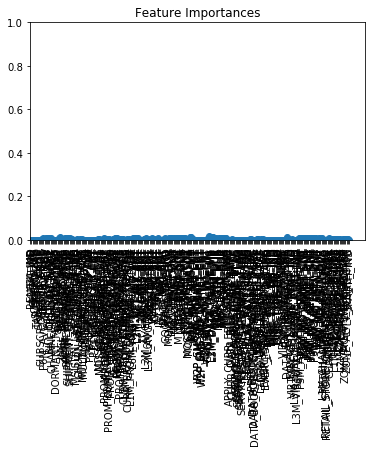

In [95]:
plt.plot(clf.feature_importances_, 'o')  
# for i in 
plt.xticks(range(train_x.shape[1]), train_df.columns[:-1], rotation=90)  
plt.ylim(0, 1)  
plt.show()  